In [1]:
import signal
import sys
import warnings
from copy import deepcopy

import numpy as np
import sncosmo
from astropy.table import Table
from matplotlib import pyplot as plt
from sndata.csp import dr1, dr3
from sndata.des import sn3yr
from tqdm import tqdm_notebook

sys.path.insert(0, '../')
from analysis_pipeline import models, classification
from analysis_pipeline.utils import split_data, calc_model_chisq as calc_chisq

warnings.simplefilter('ignore')


## Load and register data

In [3]:
# Download and register data
dr1.download_module_data()
dr3.download_module_data()
dr3.register_filters(force=True)
# sn3yr.register_filters(force=True)
models.register_sources(force=True)


## Load Spectroscopic Classifications

In [4]:
# Get list of targets that are spectroscopically classified
dr1_table_1 = dr1.load_table(1)
is_typed = ~dr1_table_1['Type'].mask
classifications = dr1_table_1['SN', 'Type'][is_typed]
classifications.show_in_notebook(display_length=10)


idx,SN,Type
0,2004dt,Normal
1,2004ef,Normal
2,2004eo,Normal
3,2004ey,Normal
4,2004gc,Normal
5,2004gs,Normal
6,2004gu,Normal
7,2005A,Normal
8,2005M,91T
9,2005ag,Normal


## Plot Pipeline Results

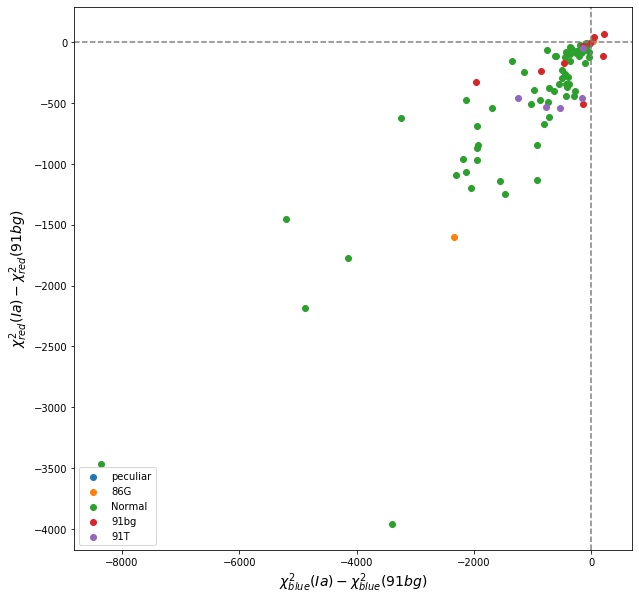

In [6]:
dr3_fits = Table.read('/Users/daniel/Github/SDSS-Classification/phot_class_results/csp_dr3_simple_fit_fits.ecsv')
dr3_fits = Table(dr3_fits, masked=True)
dr3_classifications = classification.classify_targets(dr3_fits)

plt.figure(figsize=(10, 10))
for snclass in set(classifications['Type']):
    indices = np.isin(dr3_classifications['obj_id'], classifications[classifications['Type'] == snclass]['SN'])
    plot_data = dr3_classifications[indices]
    plt.scatter(plot_data['x'], plot_data['y'], label=snclass)

plt.axvline(0, linestyle='--', color='grey')
plt.axhline(0, linestyle='--', color='grey')
plt.xlabel(r'$\chi^2_{blue}(Ia) - \chi^2_{blue}(91bg)$', fontsize=14)
plt.ylabel(r'$\chi^2_{red}(Ia) - \chi^2_{red}(91bg)$', fontsize=14)
plt.legend()
plt.show()


In [7]:
dr1_table = dr1.load_table(1)
t0 = dr1_table[dr1_table['SN'] == '2007N']['T0'][0] + 2400000.5
t0

2454124.3

In [8]:
classify_set_salt2_t0(
    all_data_table, red_data_table, blue_data_table, 
    vparams=['t0', 'x0', 'x1', 'c'],
    kwargs_s2=dict(bounds={'t0': [2454124.2, 2454124.4]}),
    kwargs_bg=dict(bounds={'x1': [0.65, 1.25], 'c': [0, 1]}),
    show_plots=True
)

norm_blue_chisq nan
norm_red_chisq nan
bg_blue_chisq nan
bg_red_chisq nan


(nan, nan)

In [9]:
des_fits = Table.read('/Users/daniel/Github/SDSS-Classification/analysis_results/des_sn3yr_simple_fit_fits.ecsv')
des_fits = Table(des_fits, masked=True)
des_classifications = classification.classify_targets(des_fits)

plt.figure(figsize=(10, 10))
plt.scatter(des_classifications['y'], des_classifications['x'], label='DES')

plt.axvline(0, linestyle='--', color='grey')
plt.axhline(0, linestyle='--', color='grey')
plt.xlabel(r'$\chi^2_{blue}(Ia) - \chi^2_{blue}(91bg)$', fontsize=14)
plt.ylabel(r'$\chi^2_{red}(Ia) - \chi^2_{red}(91bg)$', fontsize=14)
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/daniel/Github/SDSS-Classification/analysis_results/des_sn3yr_simple_fit_fits.ecsv'

In [ ]:
all_data_table = sn3yr.get_data_for_id('01330031', True)
red_data_table, blue_data_table = split_data(all_data_table, sn3yr.band_names, sn3yr.lambda_effective)
classify_set_salt2_t0(
    all_data_table, red_data_table, blue_data_table, 
    vparams=['t0', 'x0', 'x1', 'c'],
    kwargs_bg=dict(bounds={'x1': [0.65, 1.25], 'c': [0, 1]}),
    show_plots=True
)